In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import pandas as pd
import os
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Intermediate.pdf, id: 1Zd8PlhDszvFNa9RSHknnLcrB8dDz9ksj
title: genres.tar.gz, id: 12TF-rlYSeAiPcqw5KYi0Fyqik98lUrUn
title: P5 Image Captioning.zip, id: 1IZnB1oGybxAOC9Zw7Cn0oNcPrKCRqm3m
title: state-farm-distracted-driver-detection.zip, id: 1Z6vI3Hd-xO84-2pQy1bWj_MOSmrML8Nw
title: P3 Quora Text Classification with embeddings.zip, id: 1PwBHOhNTkUTJcMy-ORTLXUv0tzeuvPRG
title: question_clean.csv, id: 17p3KaqrWp-sU7tZxQezk_irAsD-7D2zh
title: stacksample.zip, id: 1HBQfLqHD77qSb4eCrQnXrisNoIpYxgdh
title: Colab Notebooks, id: 1ECsyiEikwaptJI82bu8RGNdaUeAkCk7s


In [0]:
downloaded = drive.CreateFile({'id': '1Z6vI3Hd-xO84-2pQy1bWj_MOSmrML8Nw'})
downloaded.GetContentFile('state-farm-distracted-driver-detection.zip')

In [6]:
!unzip state-farm-distracted-driver-detection.zip

Archive:  state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [6]:
os.listdir()

['.config',
 'sample_submission.csv',
 'test',
 'adc.json',
 'state-farm-distracted-driver-detection.zip',
 'imgs.zip',
 'train',
 'driver_imgs_list.csv',
 'sample_data']

In [8]:
!unzip imgs.zip

Archive:  imgs.zip


In [7]:
os.listdir()

['.config',
 'sample_submission.csv',
 'test',
 'adc.json',
 'state-farm-distracted-driver-detection.zip',
 'imgs.zip',
 'train',
 'driver_imgs_list.csv',
 'sample_data']

In [8]:
pip install tensorflow-gpu==2.0.0-alpha0

In [4]:
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

2.0.0-alpha0


True

In [0]:
#importing libraries for the data processing and model.
import pandas as pd
import numpy as np 
import os
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [0]:
# defining the path and classes.
directory = r"train"
test_directory = r"test"
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [0]:
# defining a shape to be used for our models.
img_size = 240

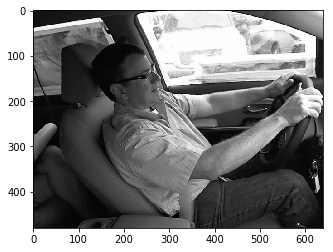

In [12]:
# Train class image for display.
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

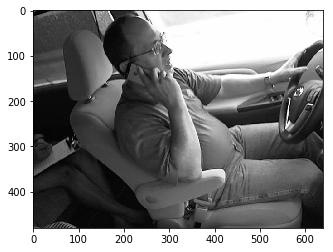

In [13]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
    test_array = img_array
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [14]:
# checkking image size using shape.
print(img_array.shape)

(480, 640)


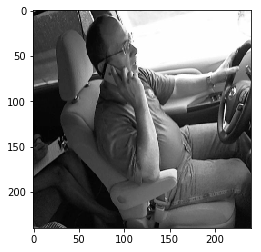

In [15]:
# trying out the resize image functionality
new_img = cv2.resize(test_array,(img_size,img_size))
plt.imshow(new_img,cmap='gray')
plt.show()

In [0]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size,img_size))
            training_data.append([
                new_img,class_num])

In [0]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size,img_size))
        testing_data.append([img,
            new_img])

In [0]:
create_training_data()

In [0]:
create_testing_data()

In [20]:
print(len(training_data))
print(len(testing_data))

22424
79726


In [0]:
random.shuffle(training_data)

In [0]:
x = []
y = []

In [0]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [24]:
x[0].shape

(240, 240)

In [25]:
len(x)

22424

In [26]:
X = np.array(x).reshape(-1,img_size,img_size,1)
X[0].shape

(240, 240, 1)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=96)

In [0]:
Y_train = utils.to_categorical(y_train,num_classes=10)
Y_test = utils.to_categorical(y_test,num_classes=10)

In [0]:
model = models.Sequential()

In [0]:
## CNN Layer 1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN Layer 2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN Layer 3
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization_v2_7 (Ba (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_v2_8 (Ba (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 119, 119, 64)     

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [0]:
callback = [callbacks.EarlyStopping(monitor='val_accuracy',patience=5)]

In [0]:
batch_size = 50
n_epochs = 15

In [61]:
results = model.fit(x_train,Y_train,
                    batch_size=batch_size,epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_test,Y_test),
                    callbacks=callback)

Train on 15696 samples, validate on 6728 samples
Epoch 1/15
15696/15696 [==============================] - 224s 14ms/sample - loss: 0.7802 - accuracy: 0.7547 - val_loss: 0.1252 - val_accuracy: 0.9645
Epoch 2/15
15696/15696 [==============================] - 222s 14ms/sample - loss: 0.1321 - accuracy: 0.9583 - val_loss: 0.2990 - val_accuracy: 0.9096
Epoch 3/15
15696/15696 [==============================] - 223s 14ms/sample - loss: 0.0847 - accuracy: 0.9725 - val_loss: 0.0572 - val_accuracy: 0.9814
Epoch 4/15
15696/15696 [==============================] - 222s 14ms/sample - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.0332 - val_accuracy: 0.9905
Epoch 5/15
15696/15696 [==============================] - 222s 14ms/sample - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.0578 - val_accuracy: 0.9842
Epoch 6/15
15696/15696 [==============================] - 222s 14ms/sample - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0325 - val_accuracy: 0.9908
Epoch 7/15
15696/15696 [=====================

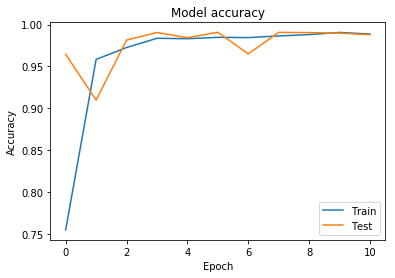

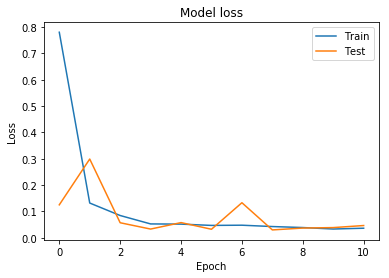

In [68]:
# Plot training & validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
preds = model.predict(np.array(testing_data[0][1]).reshape(-1,img_size,img_size,1))

In [0]:
model.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)

In [0]:
model.save('./driverdistraction_lr_weights.h5')

In [0]:
loaded_model = models.load_model('./driverdistraction_lr_weights.h5')

Prediction Prob: [[0.06689797 0.09777506 0.00309697 0.01023358 0.0007167  0.00283356
  0.5649043  0.2140742  0.03726983 0.00219787]]
Predicted: 6


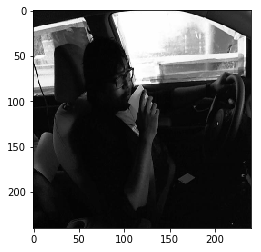

In [77]:
test_img=testing_data[2341][1]
test_data = np.array(test_img).reshape(-1,img_size,img_size,1)
preds = loaded_model.predict(test_data)
print('Prediction Prob: {}'.format(preds))
print('Predicted: {}'.format(np.argmax(preds)))
new_img = cv2.resize(test_img,(img_size,img_size))
plt.imshow(new_img,cmap='gray')
plt.show()

    c0: safe driving
    c1: texting - right
    c2: talking on the phone - right
    c3: texting - left
    c4: talking on the phone - left
    c5: operating the radio
    c6: drinking
    c7: reaching behind
    c8: hair and makeup
    c9: talking to passenger